In [ ]:
# !pip3 install sklearn
# !pip3 install pandas
# !pip3 install openpyxl

##Import packages

In [ ]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import datetime

##Import document as data frame

In [ ]:
df = pd.read_excel('./Fluxo_Escolar_por_Escola.xlsx')

##Drop unused columns

In [ ]:
drop_columns = ['NM_DIRETORIA','CD_REDE_ENSINO',	'CD_ESCOLA', 'APR_1', 'REP_1', 'ABA_1', 'APR_2', 'REP_2', 'ABA_2']
df_cleaned = df.drop(drop_columns, axis='columns')

##Renaming columns

In [ ]:
columns_renamed = {
    'Ano':'ano', 
    'NM_MUNICIPIO':'municipio', 
    'NM_COMPLETO_ESCOLA':'escola', 
    'aprovado':'aprovado', 
    'REP_3':'reprovado', 
    'abandono':'abandono'
}
df_cleaned = df_cleaned.rename(columns=columns_renamed)

##Drop rows that contains NaN from data frame (cleaned)

In [ ]:
df_cleaned = df_cleaned.dropna()

In [ ]:
#df_cleaned.head(20)

Exportando o resultado de hoje 07-11 23:31

In [ ]:
df_cleaned.to_excel('fluxo_escolar_parcialmente_tratado.xlsx', encoding="utf-8")

# Cleaning and normalizing data

##Install packages if necessary

In [ ]:
# !pip3 install yellowbrick

##Import packages

In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import pickle

##Import document as data frame

In [2]:
df_cleaned = pd.read_excel('./output/fluxo_escolar_filtered_correct_percenteges.xlsx',engine='openpyxl')
print(df_cleaned.shape)
df_cleaned.head()

(22758, 7)


,Unnamed: 0,ano,municipio,escola,aprovado,reprovado,abandono
0,1,2015,FERRAZ DE VASCONCELOS,CONJUNTO HABITACIONAL PARQUE DOURADO II,75.62,20.66,3.72
1,3,2015,SUZANO,ROBERTO BIANCHI,97.14,1.71,1.15
2,5,2015,SUZANO,CARLOS MOLTENI PROFESSOR,90.33,9.67,0.00
3,6,2015,SUZANO,GIOVANNI BATTISTA RAFFO PROFESSOR DOUTOR,98.66,1.01,0.33
4,9,2015,SUZANO,OSWALDO DE OLIVEIRA LIMA,71.92,16.73,11.35


##Removing fields with "-" value, time value and NaN value

In [3]:
df_cleaned = df_cleaned[df_cleaned != "-"]
df_cleaned = df_cleaned[df_cleaned != datetime.time(0, 0)]
df_cleaned = df_cleaned.dropna()

print(df_cleaned.shape)
df_cleaned.head()

(22758, 7)


,Unnamed: 0,ano,municipio,escola,aprovado,reprovado,abandono
0,1,2015,FERRAZ DE VASCONCELOS,CONJUNTO HABITACIONAL PARQUE DOURADO II,75.62,20.66,3.72
1,3,2015,SUZANO,ROBERTO BIANCHI,97.14,1.71,1.15
2,5,2015,SUZANO,CARLOS MOLTENI PROFESSOR,90.33,9.67,0.00
3,6,2015,SUZANO,GIOVANNI BATTISTA RAFFO PROFESSOR DOUTOR,98.66,1.01,0.33
4,9,2015,SUZANO,OSWALDO DE OLIVEIRA LIMA,71.92,16.73,11.35


##Converting datetime values to correct format

In [4]:
for index, row in df_cleaned.iterrows():
    if(isinstance(row['aprovado'], datetime.datetime)):
        if row['aprovado'].month < 10:
            new_value = str(row['aprovado'].day) + ".0" + str(row['aprovado'].month)
        else:
            new_value = str(row['aprovado'].day) + "." + str(row['aprovado'].month)
        df_cleaned['aprovado'] = df_cleaned['aprovado'].replace([row['aprovado']], new_value)

    if(isinstance(row['reprovado'], datetime.datetime)):
        if row['reprovado'].month < 10:
            new_value = str(row['reprovado'].day) + ".0" + str(row['reprovado'].month)
        else:
            new_value = str(row['reprovado'].day) + "." + str(row['reprovado'].month)
        df_cleaned['reprovado'] = df_cleaned['reprovado'].replace([row['reprovado']], new_value)

    if(isinstance(row['abandono'], datetime.datetime)):
        if row['abandono'].month < 10:
            new_value = str(row['abandono'].day) + ".0" + str(row['abandono'].month)
        else:
            new_value = str(row['abandono'].day) + "." + str(row['abandono'].month)
        df_cleaned['abandono'] = df_cleaned['abandono'].replace([row['abandono']], new_value)

print(df_cleaned.shape)
df_cleaned.head()


(22758, 7)


,Unnamed: 0,ano,municipio,escola,aprovado,reprovado,abandono
0,1,2015,FERRAZ DE VASCONCELOS,CONJUNTO HABITACIONAL PARQUE DOURADO II,75.62,20.66,3.72
1,3,2015,SUZANO,ROBERTO BIANCHI,97.14,1.71,1.15
2,5,2015,SUZANO,CARLOS MOLTENI PROFESSOR,90.33,9.67,0.00
3,6,2015,SUZANO,GIOVANNI BATTISTA RAFFO PROFESSOR DOUTOR,98.66,1.01,0.33
4,9,2015,SUZANO,OSWALDO DE OLIVEIRA LIMA,71.92,16.73,11.35


##Removing lines with negative number

In [5]:
df_cleaned['abandono'] = df_cleaned['abandono'].astype(str)
df_cleaned = df_cleaned[df_cleaned["abandono"].str.contains("-") == False]

print(df_cleaned.shape)
df_cleaned.head()

(22758, 7)


,Unnamed: 0,ano,municipio,escola,aprovado,reprovado,abandono
0,1,2015,FERRAZ DE VASCONCELOS,CONJUNTO HABITACIONAL PARQUE DOURADO II,75.62,20.66,3.72
1,3,2015,SUZANO,ROBERTO BIANCHI,97.14,1.71,1.15
2,5,2015,SUZANO,CARLOS MOLTENI PROFESSOR,90.33,9.67,0.0
3,6,2015,SUZANO,GIOVANNI BATTISTA RAFFO PROFESSOR DOUTOR,98.66,1.01,0.33
4,9,2015,SUZANO,OSWALDO DE OLIVEIRA LIMA,71.92,16.73,11.35


##Convert columns to float

In [6]:
df_cleaned['aprovado'] = df_cleaned['aprovado'].astype(float)
df_cleaned['reprovado'] = df_cleaned['reprovado'].astype(float)
df_cleaned['abandono'] = df_cleaned['abandono'].astype(float)

##Remove rows that have just 0 values and reset index

In [7]:
indexZero = df_cleaned[(df_cleaned['aprovado'] == 0) & (df_cleaned['reprovado'] == 0) & (df_cleaned['abandono'] == 0)].index
df_cleaned.drop(indexZero, inplace=True)

df_cleaned = df_cleaned.reset_index()

print(df_cleaned.shape)
df_cleaned.head()

(22758, 8)


,index,Unnamed: 0,ano,municipio,escola,aprovado,reprovado,abandono
0,0,1,2015,FERRAZ DE VASCONCELOS,CONJUNTO HABITACIONAL PARQUE DOURADO II,75.62,20.66,3.72
1,1,3,2015,SUZANO,ROBERTO BIANCHI,97.14,1.71,1.15
2,2,5,2015,SUZANO,CARLOS MOLTENI PROFESSOR,90.33,9.67,0.00
3,3,6,2015,SUZANO,GIOVANNI BATTISTA RAFFO PROFESSOR DOUTOR,98.66,1.01,0.33
4,4,9,2015,SUZANO,OSWALDO DE OLIVEIRA LIMA,71.92,16.73,11.35


##Rename fields

In [ ]:
# df_cleaned = df_cleaned.rename(columns={'Ano':'ano', 'NM_MUNICIPIO':'municipio', 'CD_REDE_ENSINO':'id_rede_ensino', 'CD_ESCOLA':'id_escola', 'NM_COMPLETO_ESCOLA':'escola', 'APR_3':'aprovado', 'REP_3':'reprovado', 'abandono':'abandono'})
# df_cleaned.head()

##Normalizing data

In [8]:
normalized_list = preprocessing.normalize([df_cleaned['ano'],df_cleaned['aprovado'],df_cleaned['reprovado'],df_cleaned['abandono']])

df_cleaned['ano_normalized'] = normalized_list[0]
df_cleaned['aprovado_normalized'] = normalized_list[1]
df_cleaned['reprovado_normalized'] = normalized_list[2]
df_cleaned['abandono_normalized'] = normalized_list[3]

df_cleaned.head()

,index,Unnamed: 0,ano,municipio,escola,aprovado,reprovado,abandono,ano_normalized,aprovado_normalized,reprovado_normalized,abandono_normalized
0,0,1,2015,FERRAZ DE VASCONCELOS,CONJUNTO HABITACIONAL PARQUE DOURADO II,75.62,20.66,3.72,0.006621,0.005496,0.012891,0.005217
1,1,3,2015,SUZANO,ROBERTO BIANCHI,97.14,1.71,1.15,0.006621,0.007060,0.001067,0.001613
2,2,5,2015,SUZANO,CARLOS MOLTENI PROFESSOR,90.33,9.67,0.00,0.006621,0.006565,0.006034,0.000000
3,3,6,2015,SUZANO,GIOVANNI BATTISTA RAFFO PROFESSOR DOUTOR,98.66,1.01,0.33,0.006621,0.007170,0.000630,0.000463
4,4,9,2015,SUZANO,OSWALDO DE OLIVEIRA LIMA,71.92,16.73,11.35,0.006621,0.005227,0.010439,0.015919


##Creating normalized file

In [10]:
df_cleaned.to_excel('./output/FluxoEscolarNormalizado.xlsx', encoding="utf-8")

# Start of creating the predictive model

##Import libs

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#Check point: Open the file created from the normalization above


##Choosing which municipality we want to analyze

In [11]:
df = pd.read_excel('./output/FluxoEscolarNormalizado.xlsx', engine='openpyxl')
df = df[df["municipio"] == "SAO PAULO"]
df.head()

,Unnamed: 0.1,index,Unnamed: 0,ano,municipio,escola,aprovado,reprovado,abandono,ano_normalized,aprovado_normalized,reprovado_normalized,abandono_normalized
87,87,87,142,2015,SAO PAULO,ALFREDO VIANELLO GREGORIO COMENDADOR,85.18,13.94,0.88,0.006621,0.006190,0.008698,0.001234
88,88,88,143,2015,SAO PAULO,JOAO BATISTA DE CARVALHO MONSENHOR,77.42,13.05,9.53,0.006621,0.005626,0.008142,0.013366
89,89,89,145,2015,SAO PAULO,RENATA GRAZIANO DE OLIVEIRA PRADO PROFESSORA,69.80,18.62,11.58,0.006621,0.005073,0.011618,0.016241
90,90,90,153,2015,SAO PAULO,LUIS MAGALHAES DE ARAUJO PROFESSOR,75.42,13.24,11.34,0.006621,0.005481,0.008261,0.015905
91,91,91,155,2015,SAO PAULO,HERCULANO DE FREITAS PROFESSOR,64.92,27.49,7.59,0.006621,0.004718,0.017152,0.010645


##Removing unnecessary columns

In [12]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'index', 'ano', 'municipio', 'escola', 'aprovado', 'reprovado', 'abandono', 'reprovado_normalized', 'abandono_normalized'], axis='columns')
df.head()

,ano_normalized,aprovado_normalized
87,0.006621,0.006190
88,0.006621,0.005626
89,0.006621,0.005073
90,0.006621,0.005481
91,0.006621,0.004718


#Scraping the data to decrease bias

In [13]:
random_df = df.sample(frac=1).reset_index(drop=True)
random_df.head()

,ano_normalized,aprovado_normalized
0,0.006641,0.007267
1,0.006621,0.006214
2,0.006611,0.005866
3,0.006628,0.005222
4,0.006621,0.005217


#Split the data frame between training and testing

In [14]:
train, test = train_test_split(random_df, test_size=0.2)

## Handling training data

#Split between predictors and classes

In [15]:
train.columns

Index(['ano_normalized', 'aprovado_normalized'], dtype='object')

#Get all the feature examples

In [16]:
x_df_train = train.iloc[:, :-1].values
x_df_train

array([[0.00663753],
       [0.00662767],
       [0.00663753],
       ...,
       [0.0066211 ],
       [0.0066211 ],
       [0.00662767]])

#Get all labels from the target

In [17]:
y_df_train = train.iloc[:, -1].values
y_df_train

array([0.00666349, 0.00683209, 0.00713878, ..., 0.00415042, 0.00700797,
       0.00605375])

#Handling categorical data with one hot encoder

In [ ]:
# onehotencoder_train = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,1])], remainder='passthrough')

In [ ]:
# x_df_train = onehotencoder_train.fit_transform(x_df_train).toarray()
# x_df_train[0]

## Handling test data

#Split between predictors and classes

In [18]:
test.columns

Index(['ano_normalized', 'aprovado_normalized'], dtype='object')

#Get all the feature examples

In [19]:
x_df_test = test.iloc[:, :-1].values
x_df_test

array([[0.00661124],
       [0.00663753],
       [0.00661124],
       [0.00662767],
       [0.0066211 ],
       [0.00661124],
       [0.0066211 ],
       [0.00662439],
       [0.00664082],
       [0.00664082],
       [0.0066211 ],
       [0.00662767],
       [0.00663096],
       [0.00664082],
       [0.00662439],
       [0.00662767],
       [0.00661124],
       [0.00662439],
       [0.00662439],
       [0.00664082],
       [0.00663096],
       [0.00662767],
       [0.00663096],
       [0.0066211 ],
       [0.00663096],
       [0.00662767],
       [0.0066211 ],
       [0.00663096],
       [0.00661124],
       [0.00662767],
       [0.00663096],
       [0.00663753],
       [0.00662439],
       [0.00661124],
       [0.0066211 ],
       [0.00663096],
       [0.00662439],
       [0.00663096],
       [0.00663753],
       [0.00663753],
       [0.00664082],
       [0.00663096],
       [0.00663753],
       [0.00663096],
       [0.00664082],
       [0.00662439],
       [0.00663096],
       [0.006

#Get all labels from the target

In [20]:
y_df_test = test.iloc[:, -1].values
y_df_test

array([0.00551597, 0.0068648 , 0.00470783, 0.00615332, 0.00558501,
       0.00536335, 0.00469547, 0.0049135 , 0.00716058, 0.00698471,
       0.00536844, 0.00646727, 0.00703776, 0.00635244, 0.00576596,
       0.00643093, 0.00613224, 0.00559227, 0.00726741, 0.00726741,
       0.00615477, 0.00663006, 0.0067725 , 0.00686988, 0.00670637,
       0.00589387, 0.00452106, 0.00497164, 0.0042696 , 0.00707991,
       0.00539896, 0.00673253, 0.00582919, 0.00713151, 0.00628413,
       0.0070632 , 0.0061148 , 0.00619402, 0.00726741, 0.00702977,
       0.00682628, 0.00639169, 0.00726741, 0.00621   , 0.00726741,
       0.00490914, 0.0062289 , 0.00726741, 0.00723471, 0.00658791,
       0.00664823, 0.00648907, 0.00513007, 0.00492585, 0.00545056,
       0.00668239, 0.00658646, 0.00705666, 0.00642439, 0.00718892,
       0.00647672, 0.00618602, 0.00500579, 0.00640186, 0.00544765,
       0.00576378, 0.00666712, 0.00699634, 0.00459228, 0.00593893,
       0.0072536 , 0.00453123, 0.0051664 , 0.00637207, 0.00715

#Handling categorical data with one hot encoder

In [ ]:
# onehotencoder_test = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,1])], remainder='passthrough')

In [ ]:
# x_df_test = onehotencoder_test.fit_transform(x_df_test).toarray()
# x_df_test[0]

##Save variables

In [21]:
with open('students.pickle', mode='wb') as f:
    pickle.dump([x_df_train, y_df_train, x_df_test, y_df_test], f)

# Test using Linear Regression Model

##Creating a linear regression object

In [24]:
regr = linear_model.LinearRegression()
regr

LinearRegression()

##Conducting training

In [25]:
regr.fit(x_df_train, y_df_train)

LinearRegression()

##Performing tests

In [26]:
aprovados_y_pred = regr.predict(x_df_test)

##Coefficients

In [27]:
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [65.8402454]


##Mean square error

In [28]:
print("Mean square error: %.2f" % mean_squared_error(y_df_test, aprovados_y_pred))

Mean square error: 0.00


##Coefficient of determination: "1" is a perfect prediction

In [29]:
print("Coefficient of determination: %.2f" % r2_score(y_df_test, aprovados_y_pred))

Coefficient of determination: 0.32


##Plots

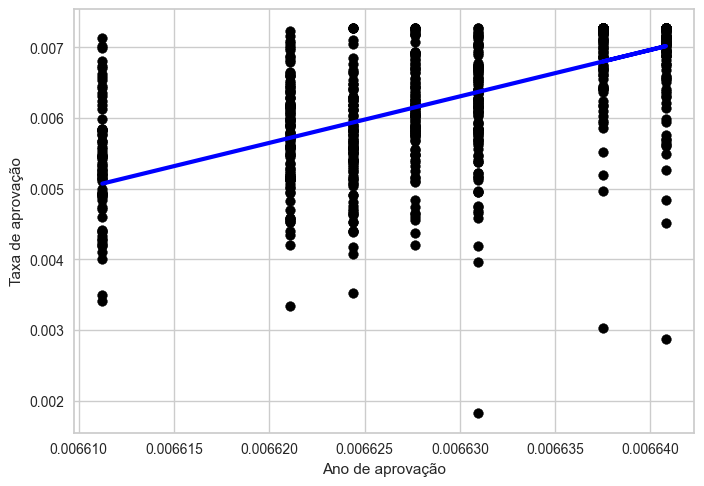

In [30]:
plt.scatter(x_df_test, y_df_test, color="black")
plt.plot(x_df_test, aprovados_y_pred, color="blue", linewidth=3)

plt.ylabel("Taxa de aprovação")
plt.xlabel("Ano de aprovação")
plt.show()